<h1>Questions to be handed in for project 4:</h1>

<p>Read about this topic here: <a href="http://mth229.github.io/zeros.html">Solving for zeros with julia</a>.</p>

<p>For the impatient, these questions are related to the zeros of a real-valued function. That is, a value $x$ with $f(x)=0$. Finding zeros of a polynomial (called "roots") in this case, is a familiar task that can be aided by a few key equations, such as the quadratic equation, but in general finding the zero of a function will require a numeric approach.  The <code>Roots</code> package of <code>Julia</code> will provide some features. This is loaded when <code>MTH229</code> is:</p>

In [1]:
include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
#using MTH229

<p>Graphically, a zero of the function $f(x)$ occurs where the graph crosses the $x$-axis. Without much work, a zero can be <em>estimated</em> to one or two decimal points from a graph. For example, we can zoom in on the zero of $f(x) = x^5 + x - 1$ by graphing over $[0,1]$:</p>

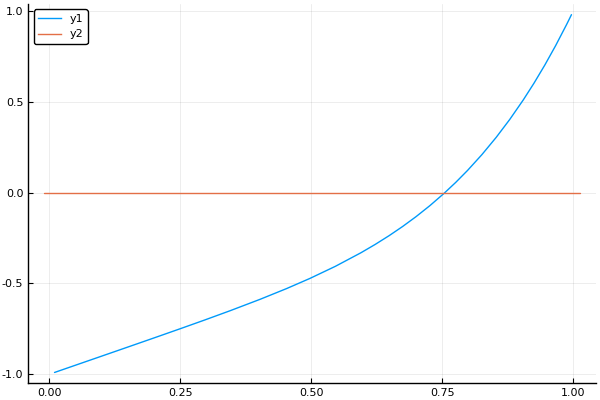

In [1]:
f(x) = x^5 + x - 1
plot(f, 0, 1)
plot!(zero)

<p>We can see the answer is near $0.75$. Be careful reading too much into a graph. Since, there are only so many pixels in a graph, and typically even fewer points chosen, so what looks like a curve, is really just a stick figure if you zoom in too far. Replotting over a smaller domain can give more accuracy, but it is better to use a graph to get a sense of <em>where</em> the desired answer is and then use  a <em>numeric</em> method to "zoom" in on the answer. In this project we discuss one such method for "zooming in" – the <em>bisection method</em>.</p>

<h4>The bisection method</h4>

<p>The notes mention the bisection method for zero-finding. This is based on the <em>intermediate value theorem</em>:</p>

<blockquote>
<p>The <a href="https://en.wikipedia.org/wiki/Intermediate_value_theorem">intermediate value theorem</a> states that if a continuous function, $f$, with an interval, $[a, b]$, as its domain, takes values $f(a)$ and $f(b)$ at each end of the interval, then it also takes any value between $f(a)$ and $f(b)$ at some point within the interval.</p>
</blockquote>

<p>For our purposes, this is specialized to "Bolzano's theorem":</p>

<blockquote>
<p>If a continuous function has values of opposite sign inside a closed interval, then it has a zero in that interval </p>
</blockquote>

<p>In particular, if $f(x)$ is <em>continuous</em> on $[a,b]$ <strong>and</strong> $f(a)$ and $f(b)$ have different signs, then there <strong>must</strong> be a value $c$ with $a < c < b$ with $f(c) = 0$.</p>

<p>There may be more than one zero, but there is a guarantee of at least one.</p>

<h2>Graphical and algebraic solutions</h2>

<ul>
<li><p>Algebraically find a zero of the linear function $f(x) = 218 - 0.65x$.</p>
</li>
</ul>

<ul>
<li><p>The quadratic function $f(x) = -16x^2 + 200x$ has one zero at $x=0$. Graphically find the other one. What is the value?</p>
</li>
</ul>

<ul>
<li><p>Graph the function $f(x)= x^2 - 2^x$. Try to graphically estimate all the <strong>non-negative</strong> zeros. Answers to one decimal point.</p>
</li>
</ul>


&#10054; `-1.414, 1.414`

&#10054; `0.0, 2.0`

&#10054; `-1.0, 1.0`

&#10054; `2.0, 4.0`




<ul>
<li><p>Graphically find the point(s) of intersection of the graphs of $f(x) = 2.5- 2e^{-x}$ and $g(x) = 1 + x^2$.</p>
</li>
</ul>

<p>The smallest one is around?</p>

<p>The largest one is around?</p>

<h2>The bisection algorithm</h2>

<p>Not all functions can have their real zeros solved algebraically, and not all applications can be answered by the accuracy provided by a graph. In such situations, numeric methods may be of interest.</p>

<p>The <code>MTH229</code> package defines a <code>bisection</code> method implementing the bisection method, it starts with values $a < b$ with $f(a)$ and $f(b)$ having different sign. In short, <code>&#91;a,b&#93;</code> is a bracketing interval.</p>

<p>The algorithm to find a value $c$ proceeds in steps. At each step the bracketing interval is split in two at a value $m$. One – and only one – of these three things must be true: either $[a,m]$ is a bracketing interval, $[m,b]$ is a bracketing interval, or $f(m) = 0$. If the latter, the algorithm stops, otherwise the new bracketing interval splits the original one in half and the process proceeds again.</p>

<p>Mathematically, unless it finds an exact zero, this process would continue infinitely, with the bracketing interval getting infinitely small, and in the process trapping the zero. On the computer, the process basically stops when the size of the bracketing interval gets too small to subdivide using floating point numbers.</p>

<ul>
<li><p>If $[a,b]$ is a <em>bracketing</em> interval, what can be said about the product $f(a) \cdot f(b)$?</p>
</li>
</ul>


&#10054; $f(a) \cdot f(b) < 0$

&#10054; $f(a) \cdot f(b) = 0$

&#10054; $f(a) \cdot f(b) > 0$




<ul>
<li><p>Suppose the <em>bisection</em> method is applied to $f(x) = x^2 - 2$ over the interval $[1~1/4, 1~1/2]$. What happens at the next step?</p>
</li>
</ul>


&#10054; Nothing, the interval $[1~1/4, 1~1/2]$ is not a bracketing interval

&#10054; The bracketing interval $[1~{1}/{4}, 1~{3}/{8}]$ is found

&#10054; The bracketing interval $[1~{3}/{8}, 1~{1}/{2}]$ is found

&#10054; The value $f(1~{3}/{8})$ is $0$, so the answer is found.




<ul>
<li><p>Suppose the <em>bisection</em> method is applied to $f(x) = \sin(x)$ over the interval $[3,4]$. What happens at the next step?</p>
</li>
</ul>


&#10054; Nothing, the interval $[3,4]$ is not a bracketing interval

&#10054; The bracketing interval $[3,3~{1}/{2}]$ is found

&#10054; The bracketing interval $[3~{1}/{2},4]$ is found

&#10054; The value $f(3~{1}/{2})$ is $0$, so the answer is found.




<p>What would the bracketing interval be after <em>three</em> bisection steps:</p>


&#10054; $[3, 3~{1}/{8}]$

&#10054; $[3 ~{1}/{8}, 3 ~{1}/{4}]$

&#10054; $[3 ~{1}/{4}, 3 ~{3}/{8}]$

&#10054; $[3 ~{3}/{8}, 3 ~{1}/{2}]$

&#10054; $[3 ~{1}/{2}, 3 ~{5}/{8}]$

&#10054; $[3 ~{5}/{8}, 3 ~{3}/{4}]$

&#10054; $[3 ~{3}/{4}, 3 ~{7}/{8}]$

&#10054; $[3 ~{7}/{8}, 4]$




<ul>
<li><p>The <code>MTH229</code> package provides the <code>bisection</code> function, called as <code>bisection&#40;f, a, b&#41;</code>, where $[a,b]$ <strong>must</strong> be a bracketing interval, to find an <em>approximation</em> to a zero guaranteed by the intermediate value theorem. It basically divides the bracketing interval until either a midpoint itself is a zero, or the interval can no longer be divided, as floating point values are ultimately discrete. </p>
</li>
</ul>

<p>Use <code>bisection&#40;sin, 3, 4&#41;</code> to estimate $\pi$. What is the value?</p>

<p>What is the value of the $\sin$ on the answer found above by <code>bisection</code>?</p>


&#10054; It is basically `1.22e-16`, close to zero but not quite

&#10054; It is exactly `0`

&#10054; It is `3.141592653589793`




<ul>
<li><p>Let $p(t) = 1 / (1 + e^{-2(t-10)}) - 3/4$.</p>
</li>
</ul>

<p>This function is an example of a <em>logistic equation</em>. Such equations help model population growth. For this one, find $t$ where $p(t) = 0$ using <code>bisection</code>.</p>

<h2>The fzero function</h2>

<p>In the <code>Roots</code> package is the <code>fzero</code> method that implements the bisection method, only a bit more carefully. The <code>MTH229</code> package loads this for you.</p>

<p>For a bracketing interval, it is guaranteed to find a <code>c</code> such that the function changes sign between adjacent floating point values around <code>c</code>, or <code>c</code> is an exact zero. It is used as: <code>fzero&#40;f, a, b&#41;</code>:</p>

In [1]:
f(x) = x^2 - 2
fzero(f, 1, 2)			# finds sqrt(2)

1.414213562373095

<hr />

<ul>
<li><p>The polynomial function $f(x) = x^5 - x - 1.3$ has one zero between $-2$ and $2$. Find it using <code>fzero</code>.</p>
</li>
</ul>

<ul>
<li><p>Show that <code>fzero&#40;f,a,b&#41;</code> works by finding a zero of the function</p>
</li>
</ul>

<p><code>f&#40;x&#41; &#61; &#40;1 &#43; &#40;1 - n&#41;^2&#41;*x - &#40;1 - n*x&#41;^2</code> when $n=8$. Use $[0, 0.5]$ as a bracketing interval. What is the value?</p>

<ul>
<li><p>Let $f(x) = \exp(x) - x^5$. In the long run the exponential dominates the polynomial and this function grows unbounded. By graphing over the interval $[0,15]$ you can see that the largest zero is less than 15. Find a bracket and then use <code>fzero</code> to identify the value of the largest zero. </p>
</li>
</ul>

<ul>
<li><p>Find the zero to the function $f(x) = 10x + 5 \cdot \ln((1-x)/x)$. (Careful with the domain.)</p>
</li>
</ul>

<ul>
<li><p>The <code>airyai</code> function is a special function of historical importance, but likely unfamiliar. (It is available when <code>MTH229</code> is loaded.) Find its largest <em>negative</em> zero by first plotting, then finding a bracketing interval, and finally using <code>fzero</code> to get a numeric value.</p>
</li>
</ul>

<p>From your graph, what is a suitable <em>bracketing</em> interval?</p>


&#10054; $[-10, 10]$

&#10054; $[-5, 5]$

&#10054; $[0, 2\pi]$

&#10054; $[-3,0]$

&#10054; $[-2, 2]$




<p>The value of the largest <em>negative</em> zero is:</p>

<hr />

<ul>
<li><p>Heads up –- the bisection algorithm can't distinguish a vertical asymptote from a zero! What is the output of trying the bisection algorithm on $f(x) = 1/x$ over the bracketing interval $[-1,1]$?</p>
</li>
</ul>

<p>What is the reason for this:</p>


&#10054; The intermediate value theorem does not apply as $f(x)$ is not continuous on $[-1,1]$

&#10054; The intermediate value theorem does not apply as $[-1,1]$ is not a bracketing interval

&#10054; This is not a good question, as the bisection method properly finds an answer of zero




<h3>Solving for $f(x) = g(x)$.</h3>

<p>Many problems are more naturally expressed by solving $f(x) = g(x)$, and not $f(x) = 0$, as expected by <code>fzero</code>. This is no issue, as it only requires the extra step of defining the difference function $h(x) = f(x) - g(x)$, as $h(x) = 0$ implies $f(x) = g(x)$.</p>

<p>For example, consider this question:</p>

<p>Find the intersection point of $4 - e^{x/10} = e^{x/15}$ by first   graphing to see approximately where the answer is. From the graph,   identify a bracket and then use <code>fzero</code> to numerically estimate the   intersection point.</p>

<p>We could plot both functions:</p>

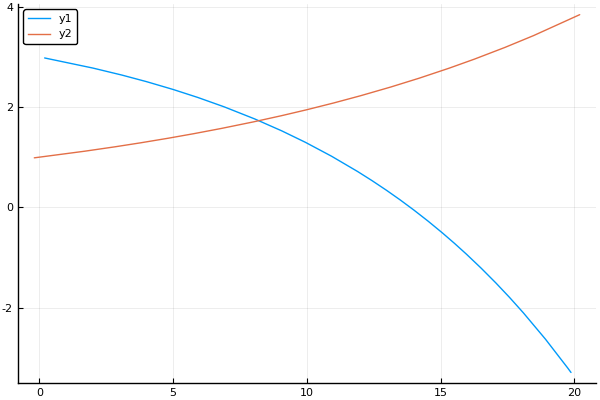

In [1]:
f(x) = 4 - exp(x/10)
g(x) = exp(x/15)
plot(f, 0, 20)
plot!(g)

<p>Or we could plot the difference:</p>

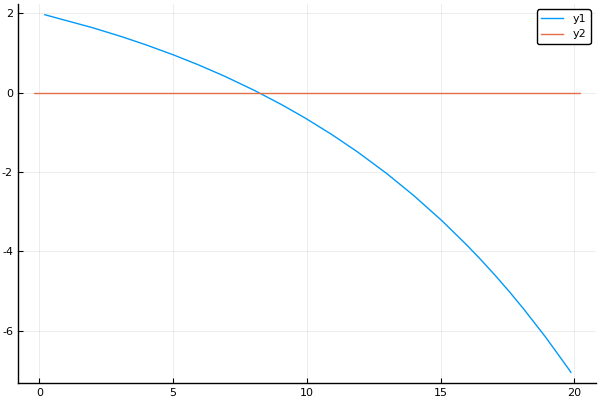

In [1]:
h(x) = f(x) - g(x)
plot(h, 0, 20)
plot!(zero)

<p>From <em>either</em> graph, we see quickly that the interval $[5,10]$ will be a bracketing interval for $h$, so we can find the intersection point with:</p>

In [1]:
fzero(h, 5, 10)

8.205886667065421

<hr />

<ul>
<li><p>Let $f(x) = 12/\sqrt{x}$ and $g(x) = e^{x/12}$ for $x > 0$. As $f$ decreases and $g$ increases, these two functions will intersect. Use the bisection method–-with the appropriate function and bracketing interval–-to find the $x$ value where $f(x) = g(x)$. What is the value?</p>
</li>
</ul>

<ul>
<li><p>A cell phone plan is based on data usage (<code>x</code> in Mb) and is modeled in <code>Julia</code></p>
</li>
</ul>

<p>by the function <code>f&#40;x&#41; &#61; x &lt; 1000 ? 25 : 25 &#43; 0.01*&#40;x-1000&#41;</code></p>

<p>For what value of <code>x</code> will $f(x)  = 45$?</p>

<ul>
<li><p>A cache of water bottles for emergency purposes has 750000 bottles. Suppose a crisis manager models the number of bottles of water left after $x$ emergency days by $f(x) = 750000 \cdot (1 - 0.25)^x$. When does the supply of water dip below $100,000$?</p>
</li>
</ul>

<p>Which of these functions is the one you need to find the zero of:</p>


&#10054; `f(x) = 750000 * (1 - 0.25)^x - 100000`

&#10054; `f(x) = 750000 * (1 - 0.25)^x + 100000`

&#10054; `f(x) = 750000 * (1 - 0.25)^x`




<p>Find a bracketing interval from a graph and then use <code>fzero</code> to get a precise numeric answer.</p>

<ul>
<li><p>For some reason, the area between the two curves $f(x) = 2 - x^2$ and $g(x) = 3 - (2x)^2$ is of interest. To study this, it is important to know when $f(x)=g(x)$. By symmetry, it is enough to know this when $x>0$. Find the $x$-value of the intersection point of the two graphs using <code>fzero</code>.</p>
</li>
</ul>

<h2>The fzeros function</h2>

<p>How to find <em>all</em> zeros of a function within a given interval? The bisection method guarantees only one between a <em>bracketing</em> interval. Well, a simple algorithm–-which is not guaranteed to find all zeros, but should do <em>pretty</em> well–-is to divide the interval into many <em>subintervals</em> and for each, see if the subinterval is a <em>bracketing</em> interval, and if so find a zero in that subinterval.</p>

<p>The <code>fzeros&#40;f, a, b&#41;</code> function does basically that, though it works a bit harder to find answers even when the subinterval is not a bracketing interval. It makes no guarantees though, as the bisection method can–-and <em>may</em>–-miss some answers. Though convenient, use <code>fzeros</code> with some caution.</p>

<p>Since <code>fzeros</code> can return 0, 1, or more zeros, it uses a container to hold its answers. This means that number won't print with 16 digits of accuracy, but this does not mean the accuracy is lost, it is just not displayed.</p>

<hr />

<ul>
<li><p>Use <code>fzeros</code> to find all the zeros of $\cos(x) - 1/2$ over $[0, 4\pi]$.</p>
</li>
</ul>


&#10054; `1.5708, 4.71239, 7.85398, 10.9956`

&#10054; `1.0472, 5.23599, 7.33038, 11.5192`

&#10054; `-1.0472, 1.0472`

&#10054; `1.0472, 5.23599`




<ul>
<li><p>Use <code>fzeros</code> to find all the roots of $e^x = x^6$ over $[-20,20]$.</p>
</li>
</ul>


&#10054; `1.29586, 12.7132`

&#10054; `-0.8155, 1.42961, 8.6131`

&#10054; `1.85718, 4.53640`

&#10054; `-0.86565, 1.22689, 16.9989`




<h3>Using answers</h3>

<p>The output of <code>fzeros</code> is a collection of values. It may be desirable to pass these onto another function. This is essentially <em>composition</em>.  For example, we can check our work using this pattern:</p>

In [1]:
f(x) = cos(x) + cos(2x)
zs = fzeros(f, 0, 2pi)
map(f, zs)

3-element Array{Float64,1}:
  3.33067e-16
  0.0        
 -1.9984e-15 

<p>We see that the values are all basically $0$, save for round-off error.</p>

<ul>
<li><p>Let $f(x) = 5x^4-6x^2$ and $g(x) = 20x^3 - 12x$. What are the values of $f$ at the zeros of $g$? Show your commands and answer.</p>
</li>
</ul>


&#10054; `1.8, 0.0, -1.8`

&#10054; `-1.8, 0.0, -1.8`

&#10054; `-0.774597, 0.0, 0.774597`




<ul>
<li><p>Let $f(x) = x^2/20 + \cos(x)$ and $g(x) = x/10 - \sin(x)$. Find the zeros of $g(x)$ in the interval $[0,10]$, then find the <em>largest</em> value of $f(x)$ among the zeros of $g$.</p>
</li>
</ul>

<p>The largest value is?</p>

<h3>Issues with numerics</h3>

<p>The <code>fzero</code> function implementing the bisection method is guaranteed to return a value where the function being evaluated crosses zero, though that value may not be an exact zero. However, this need not be the actual value being sought. This can happen when the function being evaluated is close to zero near the zero. For example, the function $(x-1)^5 = x^5 - 5x^4 + 10x^3 - 10x^2 + 5x - 1$ will be very flat near the one real zero, $1$. If we try to find this zero with the expanded polynomial, we only get close:</p>

In [1]:
f(x) = x^5 - 5x^4 + 10x^3 - 10x^2 + 5x - 1
fzero(f, .9, 1.1)

0.9994628906249997

<ul>
<li><p>What zero does <code>fzero</code> return if instead of the expanded polynomial, the factored form <code>f&#40;x&#41; &#61; &#40;x-1&#41;^5</code> were used?</p>
</li>
</ul>

<ul>
<li><p>Make a plot of the expanded polynomial over the interval $[0.999, 1.001]$. How many zeros does the graph show?</p>
</li>
</ul>


&#10054; Many zeros

&#10054; Just one at $x=1$




<ul>
<li><p>The function $g(x) = e^x - x^4$ has $3$ real zeros. If you didn't know that and searched too <em>widely</em> with <code>fzeros</code> you might miss them. (A subinterval might straddle a cluster of roots and only 1 is found, or may not straddle a bracketing interval around a pair of roots and get neither...) Does the command <code>fzeros&#40;g, -1000, 1000&#41;</code> find all three zeros?</p>
</li>
</ul>


&#10054; Yes

&#10054; No


